# ALL Analysis

In [1]:
import sys
import os;os.chdir('../')
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint,load_config
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

In [2]:
conf=load_config('inputs/all.py')
conf['resman']=RESMAN(conf)
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 9001

## Data vs Theory

In [3]:
ALL=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys()])

ALL.columns

Index([      u'Ebeam',           u'N',          u'Q2',       u'Shift',
                u'W2',       u'alpha',        u'axis',         u'col',
        u'dependence',          u'dy',      u'hadron',         u'obs',
                u'pT', u'r-residuals',   u'residuals',       u'shift',
            u'stat_u',       u'sys_u',      u'target',         u'thy',
             u'value',           u'x',           u'y',          u'yh',
                u'yp',           u'z'],
      dtype='object')

## ALL asymmetry 

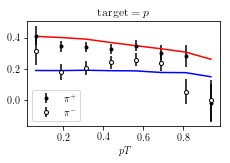

In [4]:
def plot(ax,axis,col,tar):
    if axis=='pT':
        data_pip=ALL.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi+',col))
        data_pim=ALL.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi-',col))
    else:
        data_pip=ALL.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi+',col))
        data_pim=ALL.query('dependence=="%s" and target=="%s" and hadron=="%s" and col=="%s" '%(axis,tar,'pi-',col))
    
    
    ax.errorbar(data_pip[axis],data_pip['value'],yerr=data_pip['alpha'],fmt='k.',label=r'$\pi^+$')
    ax.errorbar(data_pim[axis],data_pim['value'],yerr=data_pim['alpha'],fmt='ko', mfc='white',label=r'$\pi^-$',markersize=4)

    ax.plot(data_pip[axis].values,data_pip['thy'].values,'r-')
    ax.plot(data_pim[axis].values,data_pim['thy'].values,'b-')

    if tar=='proton': star='p'
    if tar=='deuteron': star='d'
 
    ax.set_title(r'${\rm target}=%s$'%(star))
    ax.set_xlabel(r'$%s$'%axis)
    #if axis=='x': ax.set_ylim(-0.05,0.05)

nrows,ncols=3,3
py.figure(figsize=(ncols*3,nrows*2))

cnt=0
for col in ['clas']:
    if col=='clas': targets=['proton']
    for tar in targets:
        for axis  in ['pT']:
            cnt+=1
            ax=py.subplot(nrows,ncols,cnt)
            plot(ax,axis,col,tar)
            if cnt==1: ax.legend()
py.tight_layout()

## G_1(x)

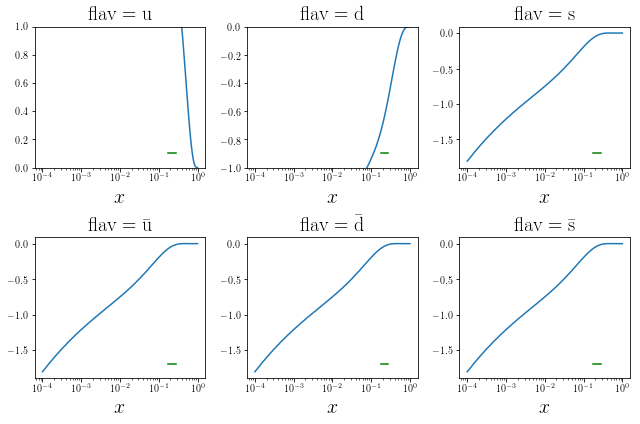

In [5]:
def plot(ax,iflav):
    X=10**np.linspace(-4,-1)
    X=np.append(X,np.linspace(0.1,1))
    Q2=1
    F=[conf['ppdf'].get_C(x,Q2,target='p')[iflav] for x in X]
    ax.plot(X,F)

    ymin,ymax=ax.get_ylim()
    if   iflav==1: ax.set_ylim(0,1);ymin,ymax=ax.get_ylim()
    elif iflav==3: ax.set_ylim(-1,0);ymin,ymax=ax.get_ylim()
    xmin=np.amin(ALL.x.values)
    xmax=np.amax(ALL.x.values)
    dy=ymax-ymin
    ax.plot([xmin,xmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
    ax.set_ylim(ymin,ymax)
    ax.semilogx()
    
    if iflav==1: ax.set_title(r'${\rm flav=u}$',size=20)
    if iflav==3: ax.set_title(r'${\rm flav=d}$',size=20)
    if iflav==5: ax.set_title(r'${\rm flav=s}$',size=20)
    if iflav==2: ax.set_title(r'${\rm flav=\bar{u}}$',size=20)
    if iflav==4: ax.set_title(r'${\rm flav=\bar{d}}$',size=20)
    if iflav==6: ax.set_title(r'${\rm flav=\bar{s}}$',size=20)
    ax.set_xlabel(r'$x$',size=20)
    
nrows,ncols=2,3
py.figure(figsize=(ncols*3,nrows*3))
cnt=0
for iflav in [1,3,5,2,4,6]:
    cnt+=1
    ax=py.subplot(nrows,ncols,cnt)
    plot(ax,iflav)
py.tight_layout()